In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/may/Desktop/AssignmentPython/ksprojects.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,KsID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# the size of the dataset
df.shape

(378661, 15)

In [5]:
# the type of each column
df.dtypes

KsID                  int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

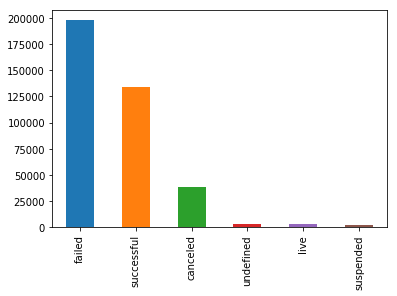

In [6]:
df['state'].value_counts().plot(kind='bar')

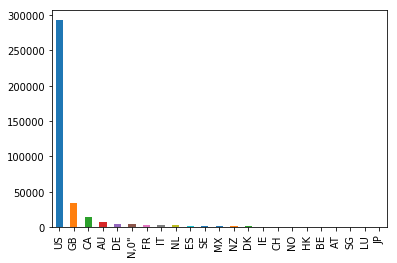

In [7]:
df['country'].value_counts().plot(kind='bar')

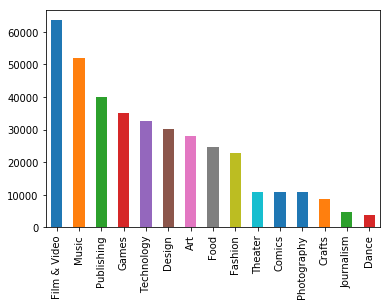

In [8]:
df['main_category'].value_counts().plot(kind='bar')

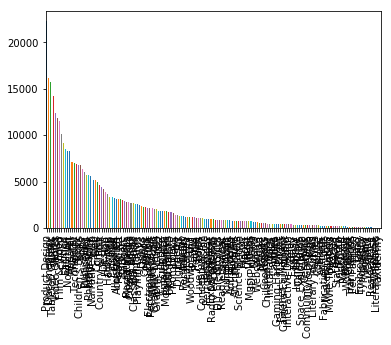

In [9]:
df['category'].value_counts().plot(kind='bar')

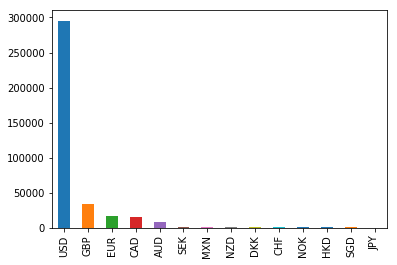

In [10]:
df['currency'].value_counts().plot(kind='bar')

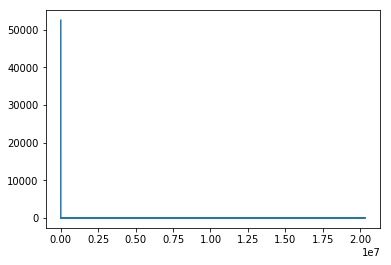

In [11]:
df['usd_pledged_real'].value_counts().plot()

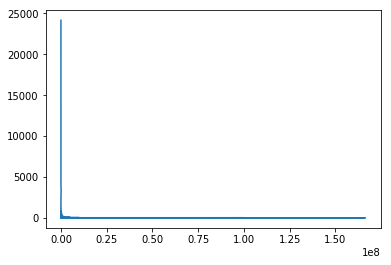

In [12]:
df['usd_goal_real'].value_counts().plot()

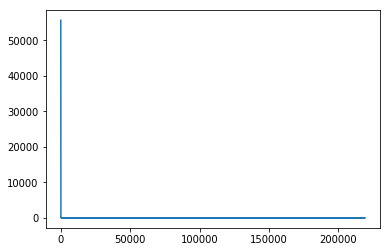

In [13]:
df['backers'].value_counts().plot()

In [14]:
df.isnull().sum()

KsID                   0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
# drop the rows without the name
df.dropna(subset=['name'],how='any',inplace=True)

In [16]:
df.isnull().sum()

KsID                   0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

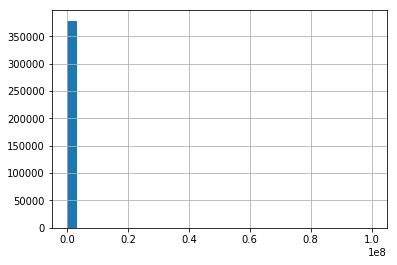

In [17]:
df['goal'].hist(bins=30)

In [18]:
df['goal_log'] = np.log(df['goal'])

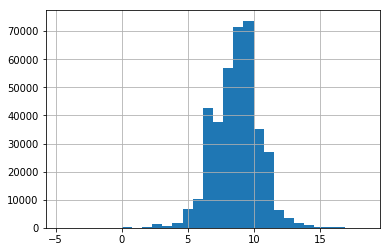

In [19]:
df['goal_log'].hist(bins=30)

In [20]:
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [21]:
newState01 = df['state'].replace(['canceled','suspended'],'failed',inplace=True)

In [22]:
df = df[df.state != 'undefined']

In [23]:
df = df[df.state != 'live']

In [24]:
df['state'].value_counts()

failed        238340
successful    133956
Name: state, dtype: int64

In [25]:
# according to the histogram chart above out[26], the X value less than 2.5 can be divided into the extreme value
df['goal_logmin']= df['goal_log']<=2.5

In [26]:
# the sum of the extreme low value
df['goal_logmin'].sum()

1299

In [27]:
# according to the histogram chart above out[26], the X value more than 14 can be divided into the extreme value
df['goal_logmax']=df['goal_log']>=14

In [28]:
# the sum of the extreme high value
df['goal_logmax'].sum()

1061

In [29]:
df = df[df.goal_log > 2.5]

In [30]:
df = df[df.goal_log < 14]

In [31]:
df.shape

(369936, 18)

In [32]:
goalOriginal = df[['goal']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()

In [33]:
goal_scaled = min_max_scaler.fit_transform(goalOriginal)
goal_normalized = pd.DataFrame(goal_scaled)
goal_normalized.head()
df['goal_normalized'] = goal_normalized
df['goal_normalized'].head()

0    0.000823
1    0.024989
2    0.037490
3    0.004156
4    0.016239
Name: goal_normalized, dtype: float64

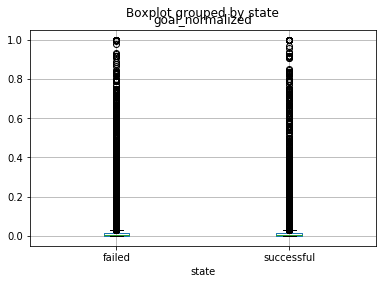

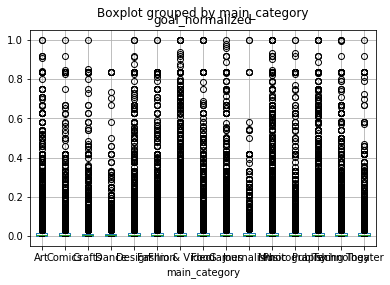

In [34]:
df.boxplot(column='goal_normalized', by='state')
df.boxplot(column='goal_normalized', by='main_category')

In [35]:
df['launched'].head()

0    11/08/2015 12:12
1     02/09/2017 4:43
2     12/01/2013 0:20
3     17/03/2012 3:24
4     04/07/2015 8:35
Name: launched, dtype: object

In [36]:
df['launched']= df.launched.str.slice(0, 11)

In [37]:
df['launched']=pd.to_datetime(df.launched, dayfirst=True)

In [38]:
df['launched'].head()

0   2015-08-11
1   2017-09-02
2   2013-01-12
3   2012-03-17
4   2015-07-04
Name: launched, dtype: datetime64[ns]

In [39]:
df['deadline']=pd.to_datetime(df.deadline, dayfirst=True)

In [40]:
df['deadline'].head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns]

In [41]:
df['launchedYear'] = df.launched.dt.year

In [42]:
df['launchedYear'].head()

0    2015
1    2017
2    2013
3    2012
4    2015
Name: launchedYear, dtype: int64

In [43]:
df['launchedYear'].value_counts()

2015    74241
2014    66274
2016    56330
2017    49232
2013    44742
2012    41091
2011    26192
2010    10505
2009     1320
1970        7
2018        2
Name: launchedYear, dtype: int64

In [44]:
df['launchedMonth'] = df.launched.dt.month

In [45]:
df['launchedMonth'].head()

0    8
1    9
2    1
3    3
4    7
Name: launchedMonth, dtype: int64

In [46]:
df['launchedWeekday'] = df.launched.dt.weekday

In [47]:
df['launchedWeekday'].head()

0    1
1    5
2    5
3    5
4    5
Name: launchedWeekday, dtype: int64

In [48]:
df['campaignDuriation']=df.deadline-df.launched

In [49]:
df['campaignDur'] = df['campaignDuriation'].map(lambda x:x.days)

In [50]:
df.dtypes

KsID                           int64
name                          object
category                      object
main_category                 object
currency                      object
deadline              datetime64[ns]
goal                         float64
launched              datetime64[ns]
pledged                      float64
state                         object
backers                        int64
country                       object
usd pledged                  float64
usd_pledged_real             float64
usd_goal_real                float64
goal_log                     float64
goal_logmin                     bool
goal_logmax                     bool
goal_normalized              float64
launchedYear                   int64
launchedMonth                  int64
launchedWeekday                int64
campaignDuriation    timedelta64[ns]
campaignDur                    int64
dtype: object

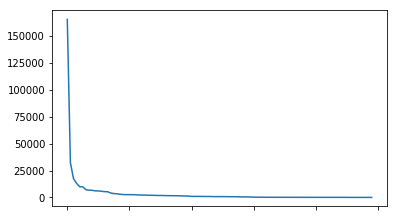

In [51]:
df['campaignDuriation'].value_counts().plot()

In [52]:
# encoding the fields, convert the type into numeric
labelencoder_X=LabelEncoder()
df['main_category']=labelencoder_X.fit_transform(df['main_category'])
df['category']=labelencoder_X.fit_transform(df['category'])
df['country']=labelencoder_X.fit_transform(df['country'])
df['state']=labelencoder_X.fit_transform(df['state'])

In [53]:
df['main_category'].head()

0    12
1     6
2     6
3    10
4     6
Name: main_category, dtype: int64

In [54]:
df.drop(columns=['goal_logmin', 'goal_logmax','pledged', 'usd pledged', 'goal', 'goal_log','campaignDuriation'], inplace=True)

In [55]:
df.dtypes

KsID                         int64
name                        object
category                     int64
main_category                int64
currency                    object
deadline            datetime64[ns]
launched            datetime64[ns]
state                        int64
backers                      int64
country                      int64
usd_pledged_real           float64
usd_goal_real              float64
goal_normalized            float64
launchedYear                 int64
launchedMonth                int64
launchedWeekday              int64
campaignDur                  int64
dtype: object

In [56]:
df.shape

(369936, 17)

In [57]:
df.to_csv('/Users/may/Desktop/AssignmentPython/ksprojectsDataPreFinish.csv',index=False)

In [58]:
newdf = pd.read_csv('/Users/may/Desktop/AssignmentPython/ksprojectsDataPreFinish.csv', encoding="ISO-8859-1")

In [59]:
newdf.shape

(369936, 17)

In [60]:
newdf.head()

,KsID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,goal_normalized,launchedYear,launchedMonth,launchedWeekday,campaignDur
0,1000002330,The Songs of Adelaide & Abullah,108,12,GBP,2015-10-09,2015-08-11,0,0,9,0.0,1533.95,0.000823,2015,8,1,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,93,6,USD,2017-11-01,2017-09-02,0,15,22,2421.0,30000.00,0.024989,2017,9,5,60
2,1000004038,Where is Hank?,93,6,USD,2013-02-26,2013-01-12,0,3,22,220.0,45000.00,0.037490,2013,1,5,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,90,10,USD,2012-04-16,2012-03-17,0,1,22,1.0,5000.00,0.004156,2012,3,5,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,55,6,USD,2015-08-29,2015-07-04,0,14,22,1283.0,19500.00,0.016239,2015,7,5,56


In [61]:
newdf.dtypes

KsID                  int64
name                 object
category              int64
main_category         int64
currency             object
deadline             object
launched             object
state                 int64
backers               int64
country               int64
usd_pledged_real    float64
usd_goal_real       float64
goal_normalized     float64
launchedYear          int64
launchedMonth         int64
launchedWeekday       int64
campaignDur           int64
dtype: object

In [62]:
from sklearn.model_selection import KFold

In [95]:
def classification_model (model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print('Accuracy:{0}%'.format(accuracy))
    kf = KFold(n_splits=5)
    kf.get_n_splits(data)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        # Get prediction using the test set
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
        print('plot:',model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
    print("Cross−Validation_Score {0}".format(np.mean(error)))
    model.fit(data[predictors], data[outcome])

In [96]:
outcome_var ='state'

In [97]:
predictor_var = ['usd_goal_real','launchedYear', 'launchedMonth','launchedWeekday','main_category','campaignDur','country']

In [98]:
model = DecisionTreeClassifier()

In [99]:
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.9620583019765581%
plot: 0.6064767259555603
plot: 0.6064984389149445
plot: 0.6082284725695054
plot: 0.6078635435954965
plot: 0.6098368632327301
Cross−Validation_Score 0.6077808088536474


In [100]:
model = DecisionTreeClassifier(max_depth=30, min_samples_split=100)

In [101]:
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7213220665196142%
plot: 0.667432556630805
plot: 0.6684552691689081
plot: 0.6690634841255896
plot: 0.666508981307527
plot: 0.672969575736278
Cross−Validation_Score 0.6688859733938215


In [102]:
model = DecisionTreeClassifier(max_depth=30, min_samples_split=100,max_features='sqrt')

In [103]:
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7083090048008304%
plot: 0.6676352922095475
plot: 0.667346966358955
plot: 0.6686309757119494
plot: 0.6690905159014422
plot: 0.6709016448835606
Cross−Validation_Score 0.668721079013091


In [104]:
model = RandomForestClassifier()

In [105]:
classification_model(model, newdf, predictor_var, outcome_var)

Accuracy:0.9433091129276415%
plot: 0.6476861112612856
plot: 0.6470190709178639
plot: 0.6485328503656048
plot: 0.6477759606417344
plot: 0.6513171232784137
Cross−Validation_Score 0.6484662232929805


In [106]:
model = RandomForestClassifier(n_estimators=80,max_depth=30)

In [107]:
classification_model(model, newdf, predictor_var, outcome_var)

Accuracy:0.9616203883915055%
plot: 0.6594312591231011
plot: 0.6595347831375782
plot: 0.6596023625772095
plot: 0.6583994485517726
plot: 0.6614675551110331
Cross−Validation_Score 0.6596870817001389


In [70]:
model = RandomForestClassifier(n_estimators=80,
                               min_samples_split=100,
                               min_samples_leaf=20,
                               max_features='sqrt',
                               random_state=10,
                               max_depth=60,
                               oob_score=True)
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7109716275247611%
plot: 0.6881791641887873
plot: 0.6875937664724884
plot: 0.69062132536797
plot: 0.688256044980875
plot: 0.6891751253598605
Cross−Validation_Score 0.6887650852739962


In [71]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)

In [72]:
featimp

usd_goal_real      0.365627
campaignDur        0.214238
main_category      0.170511
launchedYear       0.115119
launchedMonth      0.059211
launchedWeekday    0.041828
country            0.033465
dtype: float64

In [73]:
predictor_var = ['usd_goal_real','launchedYear', 'launchedMonth','main_category','campaignDur']

In [74]:
model = RandomForestClassifier(n_estimators=80,min_samples_split=100,min_samples_leaf=20,max_features='sqrt',random_state=10,max_depth=60,oob_score=True)
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7104526188313655%
plot: 0.6874898632210629
plot: 0.6874045440415208
plot: 0.6893778636787544
plot: 0.6878235365672348
plot: 0.6908105477989377
Cross−Validation_Score 0.6885812710615021


In [75]:
predictor_var = ['usd_goal_real','launchedYear', 'launchedMonth','launchedWeekday','main_category','campaignDur']

In [76]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=60,min_samples_leaf=10,max_features='sqrt',random_state=18,max_depth=100,oob_score=True)
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7256471389645777%
plot: 0.6869762664215818
plot: 0.6870396150675119
plot: 0.688256044980875
plot: 0.6875937664724884
plot: 0.6907294524713801
Cross−Validation_Score 0.6881190290827675


In [77]:
# setting the fold as 10
def classification_model (model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print('Accuracy:{0}%'.format(accuracy))
    kf = KFold(n_splits=10)
    kf.get_n_splits(data)
    error = []
    for train, test in kf.split(data):
        train_predictors = (data[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
        print('plot:',model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))
    print("Cross−Validation_Score {0}".format(np.mean(error)))
    model.fit(data[predictors], data[outcome])

In [78]:
outcome_var ='state'

In [79]:
predictor_var = ['usd_goal_real','launchedYear', 'launchedMonth','launchedWeekday','main_category','campaignDur']

In [80]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=60,min_samples_leaf=10,max_features='sqrt',random_state=18,max_depth=100,oob_score=True)
classification_model(model, df, predictor_var, outcome_var)

Accuracy:0.7256471389645777%
plot: 0.6867600151375899
plot: 0.6863815753906038
plot: 0.6856517273071309
plot: 0.6898686273449749
plot: 0.6883008055360329
plot: 0.6895983132399849
plot: 0.6865623226015732
plot: 0.6891303760170843
plot: 0.6916173330089477
plot: 0.6878868975211526
Cross−Validation_Score 0.6881757993105075


In [81]:
newdf.head()

,KsID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,goal_normalized,launchedYear,launchedMonth,launchedWeekday,campaignDur
0,1000002330,The Songs of Adelaide & Abullah,108,12,GBP,2015-10-09,2015-08-11,0,0,9,0.0,1533.95,0.000823,2015,8,1,59
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,93,6,USD,2017-11-01,2017-09-02,0,15,22,2421.0,30000.00,0.024989,2017,9,5,60
2,1000004038,Where is Hank?,93,6,USD,2013-02-26,2013-01-12,0,3,22,220.0,45000.00,0.037490,2013,1,5,45
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,90,10,USD,2012-04-16,2012-03-17,0,1,22,1.0,5000.00,0.004156,2012,3,5,30
4,1000011046,Community Film Project: The Art of Neighborhoo...,55,6,USD,2015-08-29,2015-07-04,0,14,22,1283.0,19500.00,0.016239,2015,7,5,56


In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [83]:
xnewdf = newdf[['usd_goal_real','launchedYear', 'launchedMonth','launchedWeekday','main_category','campaignDur']]

In [84]:
X = xnewdf.values

In [85]:
y = newdf["state"].values

In [123]:
n_classes = y.shape

In [125]:
n_classes

(369936,)

In [126]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,random_state=42)

In [127]:
ksTree = RandomForestClassifier(n_estimators=100,min_samples_split=60,min_samples_leaf=10,max_features='sqrt',random_state=18,max_depth=100,oob_score=True)

In [128]:
scores = cross_val_score(ksTree, X, y, cv=5, scoring='accuracy')

In [129]:
testScore = ksTree.fit(X_trainset,y_trainset)

In [130]:
predTreeTrain = ksTree.predict(X_trainset)
predTreeTest = ksTree.predict(X_testset)

In [131]:
print("randomforest's Accuracy for trainning: ", metrics.accuracy_score(y_trainset, predTreeTrain))
print("randomforest's Accuracy for predicting: ", metrics.accuracy_score(y_testset, predTreeTest))

randomforest's Accuracy for trainning:  0.7262445395960382
randomforest's Accuracy for predicting:  0.6880974006314606


In [137]:
print(confusion_matrix(y_testset, predTreeTest))
print(classification_report(y_testset, predTreeTest))

[[51193  8056]
 [20790 12445]]
             precision    recall  f1-score   support

          0       0.71      0.86      0.78     59249
          1       0.61      0.37      0.46     33235

avg / total       0.67      0.69      0.67     92484



In [154]:
y_pred_proba = ksTree.predict_proba(X_testset)[::,1]

In [155]:
fpr, tpr, _ = metrics.roc_curve(y_testset,  y_pred_proba)

In [156]:
auc = metrics.roc_auc_score(y_testset, y_pred_proba)

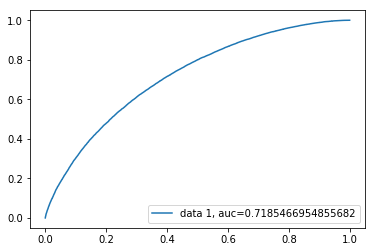

In [157]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [139]:
dcTree = DecisionTreeClassifier(max_depth=30, min_samples_split=100)

In [140]:
scores = cross_val_score(dcTree, X, y, cv=5, scoring='accuracy')

In [142]:
testDcScore = dcTree.fit(X_trainset,y_trainset)

In [143]:
predDcTreeTrain = dcTree.predict(X_trainset)
predDcTreeTest = dcTree.predict(X_testset)

In [144]:
print("randomforest's Accuracy for trainning: ", metrics.accuracy_score(y_trainset, predDcTreeTrain))
print("randomforest's Accuracy for predicting: ", metrics.accuracy_score(y_testset, predDcTreeTest))

randomforest's Accuracy for trainning:  0.7199767887778787
randomforest's Accuracy for predicting:  0.6699104710003893


In [145]:
print(confusion_matrix(y_testset, predDcTreeTest))
print(classification_report(y_testset, predDcTreeTest))

[[48384 10865]
 [19663 13572]]
             precision    recall  f1-score   support

          0       0.71      0.82      0.76     59249
          1       0.56      0.41      0.47     33235

avg / total       0.66      0.67      0.66     92484



In [147]:
from sklearn.metrics import roc_curve, auc
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [149]:
y_pred_proba = dcTree.predict_proba(X_testset)[::,1]

In [150]:
fpr, tpr, _ = metrics.roc_curve(y_testset,  y_pred_proba)

In [151]:
auc = metrics.roc_auc_score(y_testset, y_pred_proba)

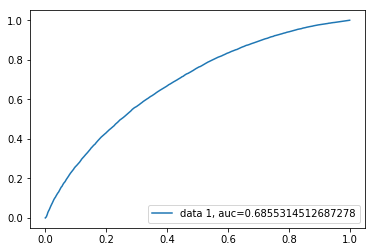

In [153]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()